In [36]:
import VizKG.visualize as vkg

sparql_service_url = "http://127.0.0.1:3030/lex2kg/sparql"
# help(vkg)

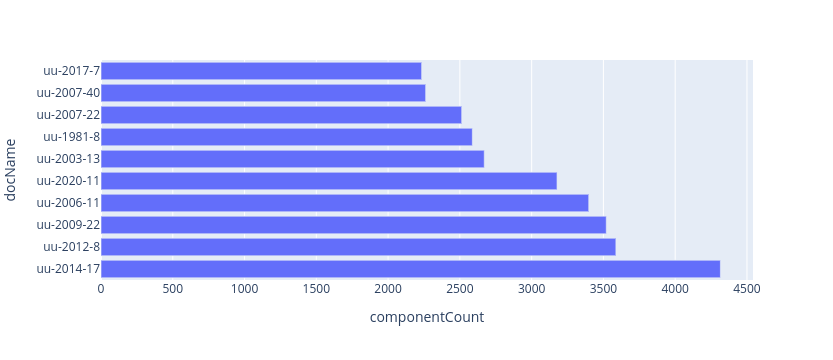

In [2]:
sparql_query = """
PREFIX o: <https://example.org/lex2kg/ontology/>

SELECT ?docName (COUNT(?component) as ?componentCount)
WHERE {
  ?doc a o:Peraturan .
  ?component o:bagianDari* ?doc .
  BIND(REPLACE(REPLACE(STR(?doc), "https://example.org/lex2kg/", ""), "/", "-") as ?docName) .
}
GROUP BY ?docName
ORDER BY DESC(?componentCount)
LIMIT 10
"""

bubble = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='BarChart')
bubble.plot()

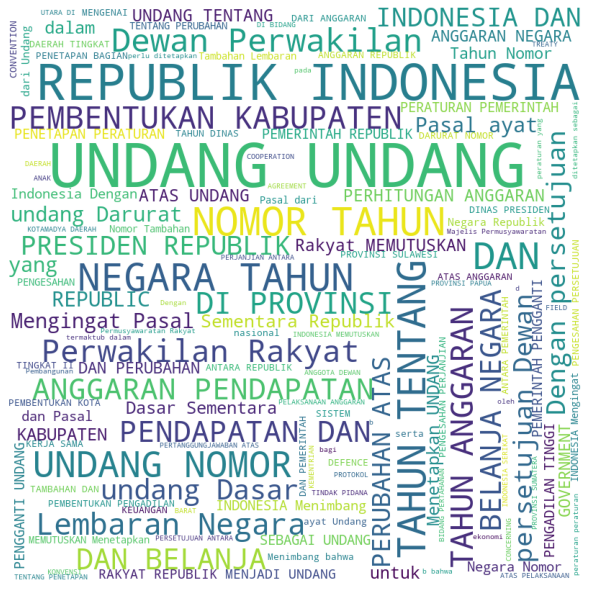

In [3]:
sparql_query = """
 PREFIX o: <https://example.org/lex2kg/ontology/>
 SELECT ?title WHERE { 
 ?law o:tentang ?title .
 }
"""
words = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='WordCloud')
words.plot()

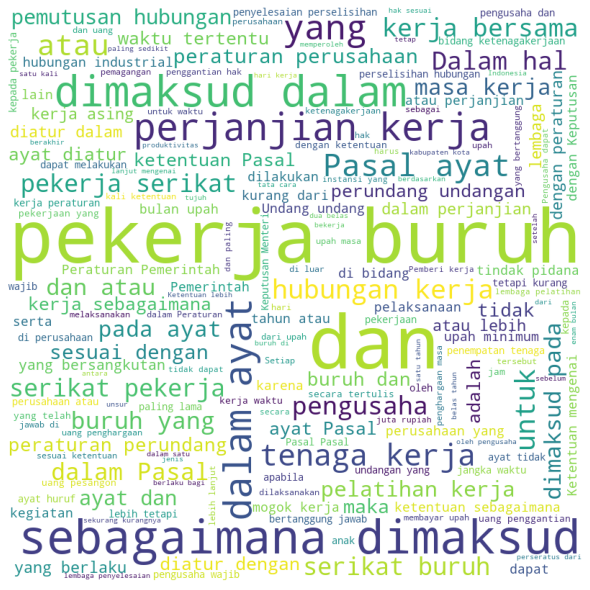

In [68]:
sparql_query = """
PREFIX o: <https://example.org/lex2kg/ontology/>
SELECT* WHERE { 
?komponen o:bagianDari* <https://example.org/lex2kg/uu/2003/13> ;
          a o:Segmen ;
          o:teks ?teks .
}
"""
words = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='WordCloud')
words.plot()

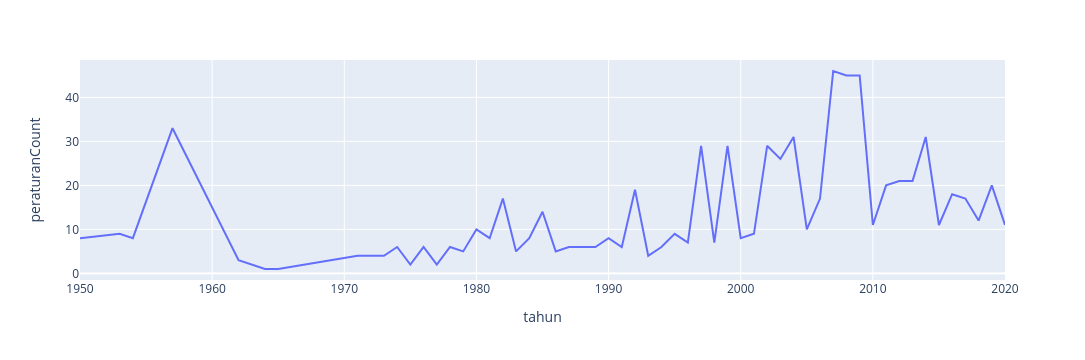

In [69]:
sparql_query = """
PREFIX o: <https://example.org/lex2kg/ontology/>
SELECT ?tahun (COUNT(?peraturan) as ?peraturanCount)
WHERE { ?peraturan o:tahun ?tahun .}
GROUP BY ?tahun
ORDER BY ?tahun
"""
words = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='linechart')
words.plot()

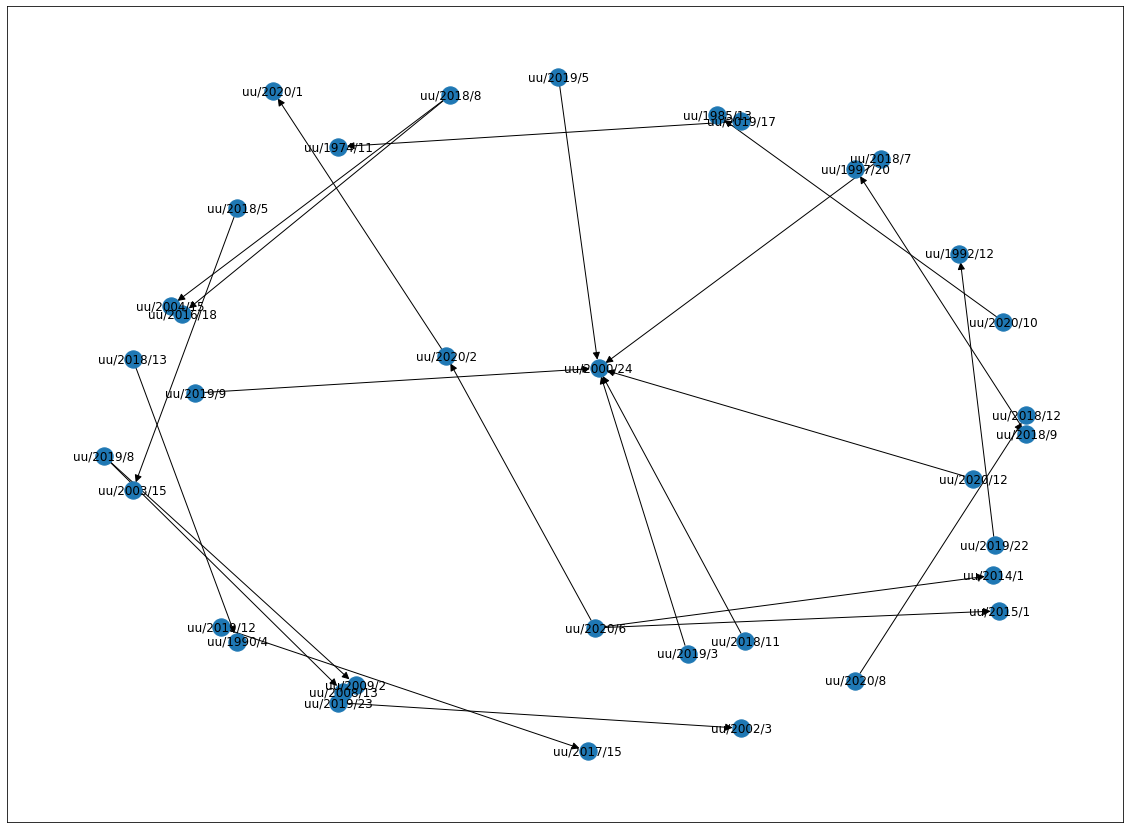

In [66]:
sparql_query = """
PREFIX o: <https://example.org/lex2kg/ontology/>
PREFIX uu: <https://example.org/lex2kg/uu/>

SELECT DISTINCT ?penimbang ?penimbangStr ?ditimbang ?ditimbangStr
WHERE {
  ?penimbang o:menimbang ?menimbang .
  ?menimbangText o:bagianDari* ?menimbang .
  ?menimbangText o:merujuk ?ditimbang .
  ?ditimbang a o:Peraturan .
  ?penimbang o:tahun ?tahun .
  BIND(REPLACE(STR(?penimbang),"https://example.org/lex2kg/","") as ?penimbangStr) .
  BIND(REPLACE(STR(?ditimbang),"https://example.org/lex2kg/","") as ?ditimbangStr) .
  FILTER(?tahun > 2017)
}
"""
graph = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="graph")
graph.plot()